In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape

(20640, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# 4   total_bedrooms      20433 non-null  float64. 207 missing
# 9   ocean_proximity     20640 non-null  object . non numeric
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
# <1H OCEAN     9136. 1 Hour from ocean
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

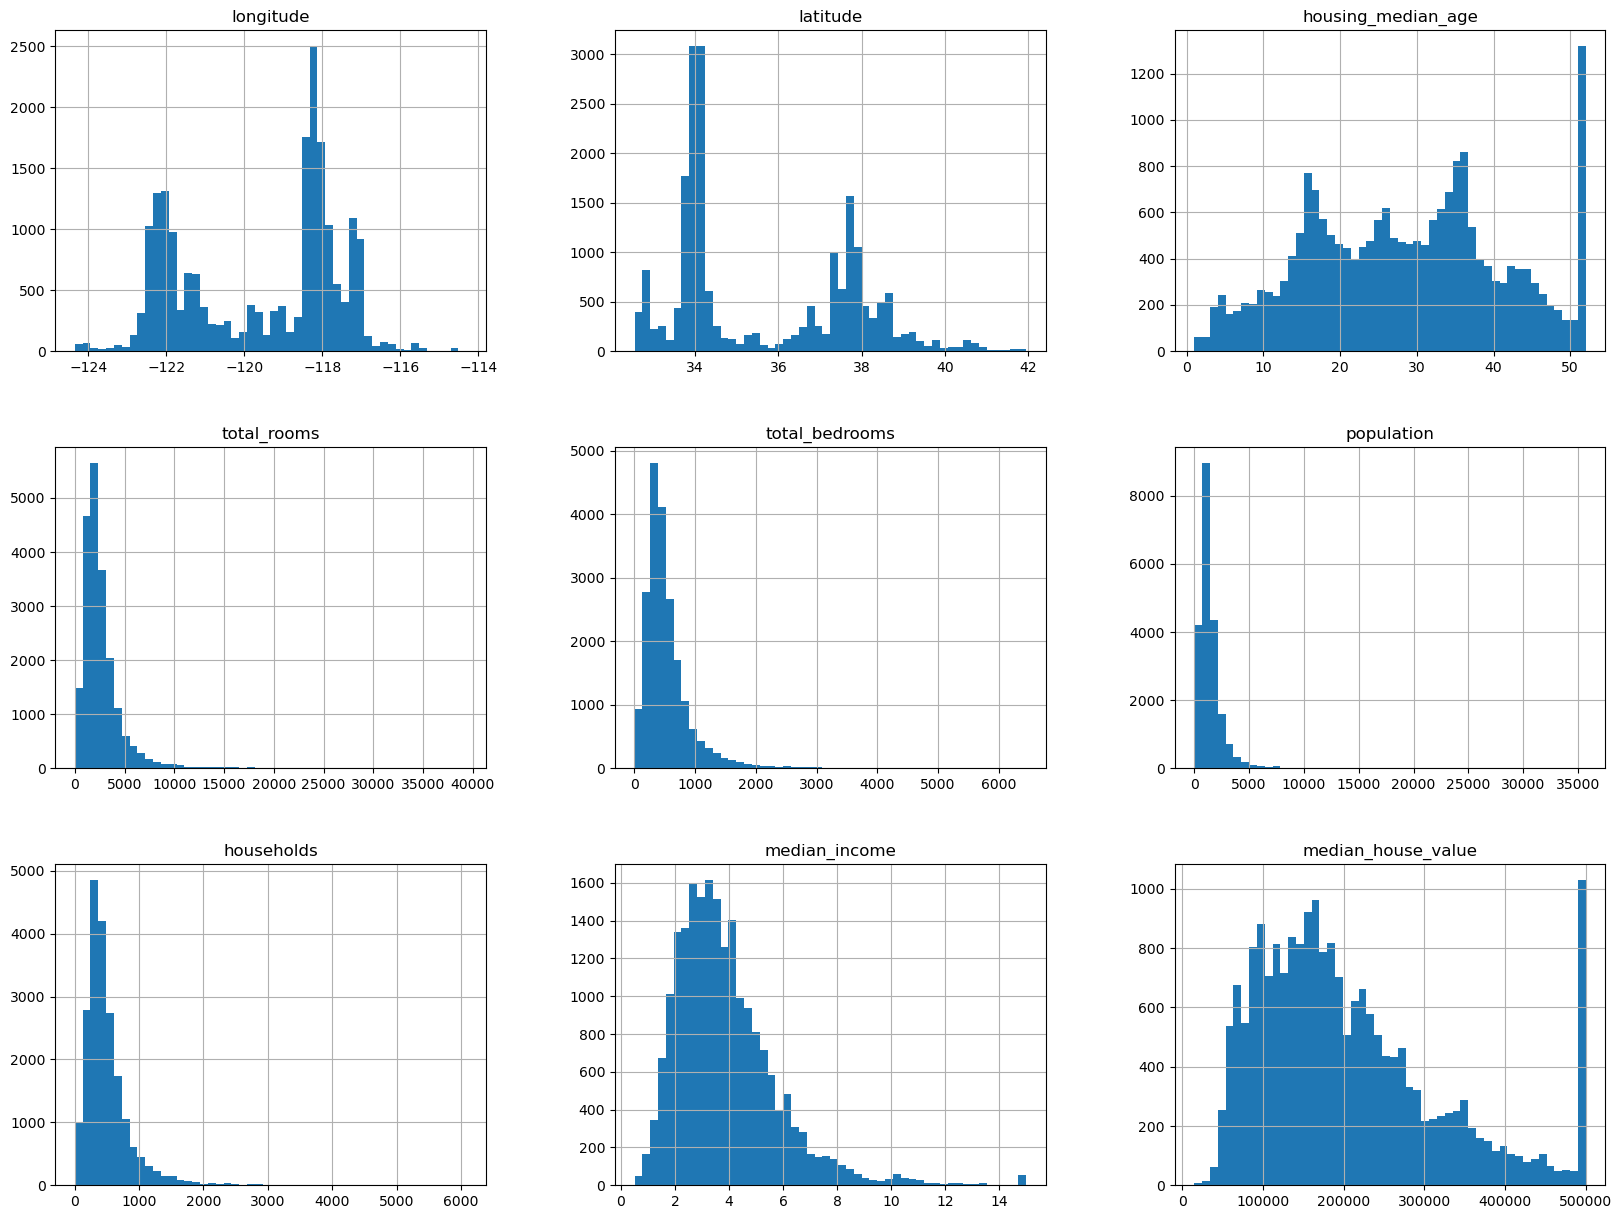

In [11]:
# visuals
df.hist(bins=50, figsize=(20,15))

<Axes: xlabel='longitude', ylabel='latitude'>

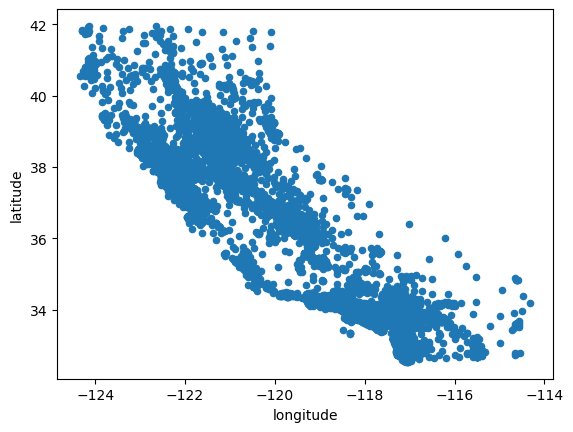

In [13]:
# median_house_value has large outliers, 500k has a lot of mis-priced homes
df.plot(kind='scatter',x='longitude', y='latitude')


<Axes: xlabel='longitude', ylabel='latitude'>

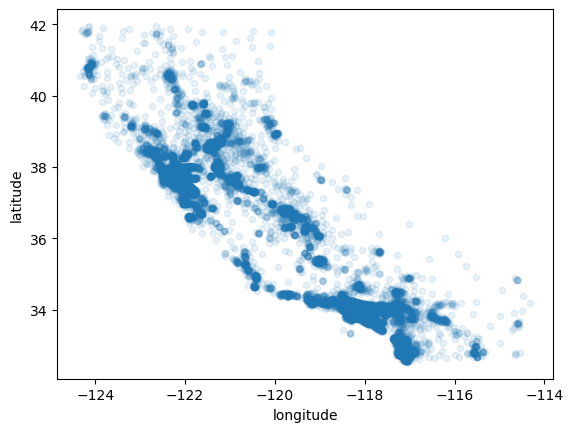

In [14]:
df.plot(kind='scatter',x='longitude', y='latitude', alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

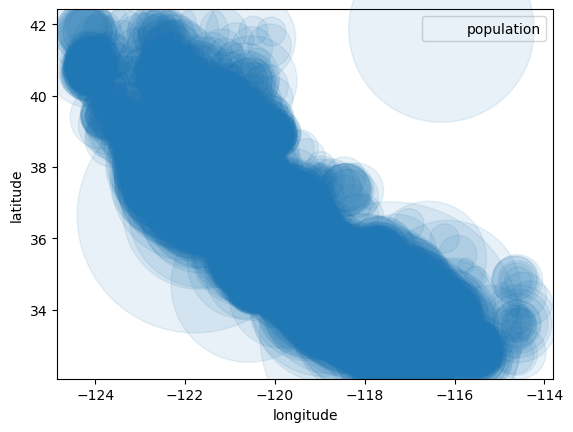

In [16]:
df.plot(kind='scatter',x='longitude', y='latitude', alpha=0.1, s=df['population'],label='population')

<Axes: xlabel='longitude', ylabel='latitude'>

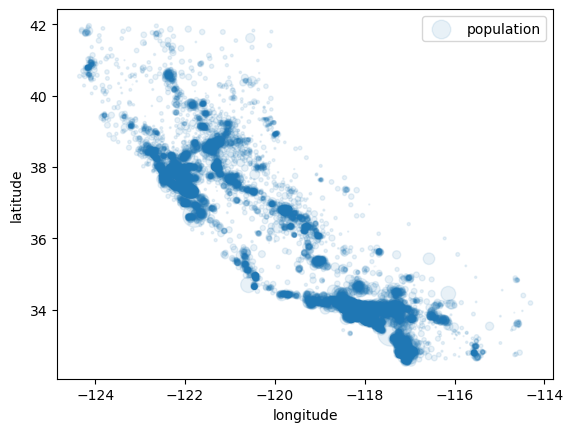

In [17]:
df.plot(kind='scatter',x='longitude', y='latitude', alpha=0.1, s=df['population']/100,label='population')

<Axes: xlabel='longitude', ylabel='latitude'>

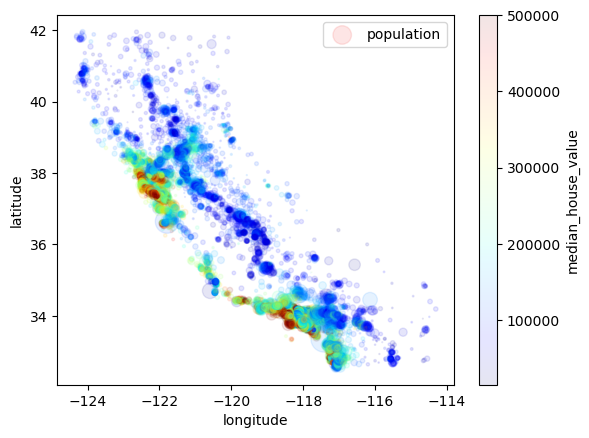

In [18]:
df.plot(kind='scatter',x='longitude', y='latitude', alpha=0.1, s=df['population']/100,label='population', c='median_house_value',cmap=plt.get_cmap('jet'))

In [22]:
#corr_matrix=df.corr()
#corr_matrix['median_house_value'].sort_values(ascending=False)

In [21]:


numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sorted_corr = corr_matrix['median_house_value'].sort_values(ascending=False)
print(sorted_corr)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [33]:
# latitude             -0.144160. weak correlation. house price decrease with latitude
# house price correlates with income. median_income         0.688075
# drop those missing 207 values
df_na=df.dropna(subset=['total_bedrooms'])
df_na.shape
#df.shape

(20433, 10)

In [34]:
dummies = pd.get_dummies(df_na.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [35]:
dummies = pd.get_dummies(df_na.ocean_proximity)

# Convert the dummy DataFrame from boolean to integer
dummies = dummies.astype(int)

# View the result
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [36]:
#df_na = pd.concat([df_na, dummies], axis=1)
# Optionally drop the original column if it's no longer needed
df_na_dummies = pd.concat([df_na, dummies],axis='columns')


In [37]:
df_na_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [38]:
# drop ocean_proximity for regression (needs numeric values) and drop one of the binary values
# otherwise correlation will be 100%
# drop ISLAND as only 5 values other than 0
df_clean=df_na_dummies.drop(['ocean_proximity', 'ISLAND'], axis='columns')
df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [39]:
# create featured and labelled datasets
# data is clean, now train and evaluate linear regression (OLS) model
# x all columns except labelled dataset, predict median house value column, so use all variables except that column
# so features include all values except column median_house_value
X = df_clean.drop(columns=['median_house_value'])
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [40]:
# so now
y=df_clean['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1984)

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
# check intercept and coefficients of model
print(lr.intercept_)

-2146719.4958723723


In [44]:
print('Intercept is' + str(lr.intercept_))

Intercept is-2146719.4958723723


In [45]:
print('coefficients are' + str(lr.coef_))

coefficients are[-2.72191872e+04 -2.61224400e+04  1.03631750e+03 -6.39771322e+00
  9.97707401e+01 -3.73545857e+01  4.99035484e+01  3.93656164e+04
 -1.49036788e+05 -1.87787533e+05 -1.51883617e+05 -1.45673607e+05]


In [46]:
# R-squared
print(lr.score(X_train,y_train))

0.6433902949192565


In [49]:
print(' R-squared value is ' + str(lr.score(X_train,y_train)))

 R-squared value is 0.6433902949192565


In [51]:
# predicting
y_pred=lr.predict(X_test)
performance=pd.DataFrame({'PREDICTIONS': y_pred,'ACTUAL': y_test})
performance.head()

,PREDICTIONS,ACTUAL
15175,315646.738470,328200.0
15424,235926.156196,156900.0
16212,157003.325611,87200.0
15356,172404.340246,141000.0
1899,82931.270634,100800.0


In [52]:
y_pred=lr.predict(X_test)
performance=pd.DataFrame({'PREDICTIONS': y_pred,'ACTUAL': y_test})
performance['error']=performance['ACTUAL']-performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL,error
15175,315646.738470,328200.0,12553.261530
15424,235926.156196,156900.0,-79026.156196
16212,157003.325611,87200.0,-69803.325611
15356,172404.340246,141000.0,-31404.340246
1899,82931.270634,100800.0,17868.729366


In [53]:
# preparing data for plotting
performance.reset_index(drop=True,inplace=True)
performance.reset_index(inplace=True)
performance.head()

,index,PREDICTIONS,ACTUAL,error
0,0,315646.738470,328200.0,12553.261530
1,1,235926.156196,156900.0,-79026.156196
2,2,157003.325611,87200.0,-69803.325611
3,3,172404.340246,141000.0,-31404.340246
4,4,82931.270634,100800.0,17868.729366


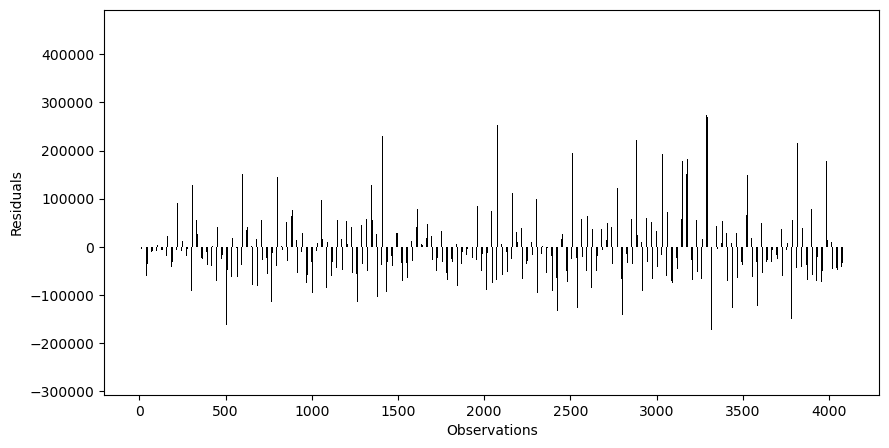

In [59]:
# plot residuals
fig=plt.figure(figsize=(10,5))
plt.bar('index','error', data=performance, color='black', width=0.3)
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.show()

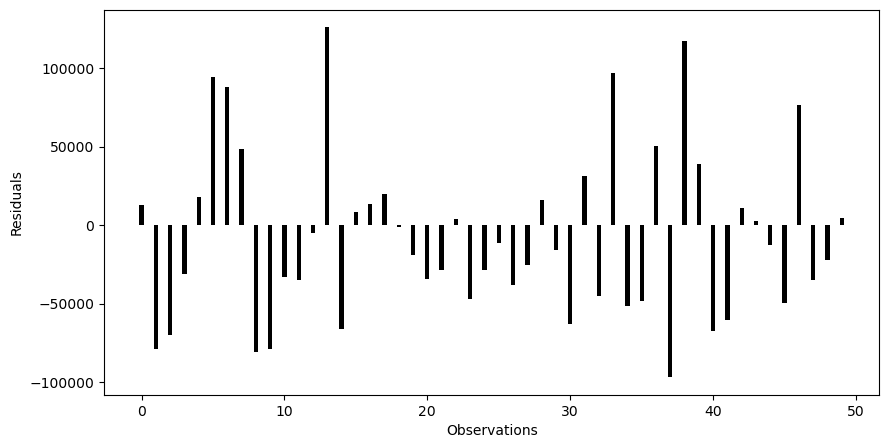

In [60]:
# over 4000. zoom in on first 50 obs. [:50]

fig=plt.figure(figsize=(10,5))
plt.bar('index','error', data=performance[:50], color='black', width=0.3)
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.show()

In [62]:
# shows whether overestimated or underestimated values
# when error is positive it means prediction is less than actual (underestimating)
# when negative (overestimating). perfect model would be zero (never going to happen)
import statsmodels.api as sm
X_train=sm.add_constant(X_train) # adds a constant =1 to training set
X_train.head()
# original x-train dataset did not have 'const' needed for statsmodels api 


,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
6885,1.0,-118.09,34.06,31.0,1146.0,289.0,1163.0,258.0,2.2083,1,0,0,0
4220,1.0,-118.28,34.12,50.0,2384.0,312.0,836.0,337.0,12.8763,1,0,0,0
9915,1.0,-122.31,38.33,21.0,1922.0,344.0,1051.0,342.0,3.6042,0,0,1,0
294,1.0,-122.17,37.77,39.0,1612.0,342.0,912.0,322.0,3.3958,0,0,1,0
6574,1.0,-118.16,34.20,43.0,1810.0,343.0,988.0,307.0,3.8203,1,0,0,0


In [65]:
# fit to new....